# Flash Sales

### Загоняем данные

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [193]:
data = pd.read_csv('Магазин_данные_2.csv', delimiter=';')
# xlsx я почистил, позаменял запятые на точки, сделал в csv. просто ручками в экселе.

In [194]:
new_column_names = {
    'Department': 'dep',
    'Major Product Category': 'cat',
    'Product Type': 'type',
    'Make (Brand)': 'brand',
    'Product': 'item',
    'Regular/ Suggested Retail Price (USD)': 'price',
    'Price During Flash Sale': 'disc_price',
    'Quantity Available During Flash Sale': 'quantity',
    'Customer Rating': 'rating'
}
data = data.rename(columns=new_column_names)
data

,dep,cat,type,brand,item,price,disc_price,quantity,rating
0,Appliances,Laundry Appliances,Dryer,Brand FF,"7.0cu ft 13-Cycle Electric Dryer, White",679.99,499.99,5,4.6
1,Appliances,Laundry Appliances,Dryer,Brand M,"7.2cu ft 3-Cycle Electric Dryer, White",629.99,429.99,5,4.5
2,Appliances,Laundry Appliances,Dryer,Brand W,"7.3cu ft 8-Cycle Electric Dryer, White",719.99,579.99,8,4.7
3,Appliances,Laundry Appliances,Dryer,Brand W,7.4cu ft 10-Cycle Smart Wi-Fi Enabled Electric...,809.99,599.99,8,4.6
4,Appliances,Laundry Appliances,Washer,Brand X,"3.8cu ft 12-Cycle Top-Loading Washer, White",809.99,469.99,5,4.5
...,...,...,...,...,...,...,...,...,...
129,Video Gaming,PC Gaming,Gaming Desktop,Brand Q,"Gaming Desktop, Intel Core i7-9700K, 16GB RAM,...",1699.99,1499.99,15,4.7
130,Video Gaming,PC Gaming,Gaming Laptop,Brand P,"15.6"" Gaming Laptop, AMD Ryzen 5, 8GB Ram, NVI...",799.99,449.99,10,5.0
131,Video Gaming,PC Gaming,Gaming Laptop,Brand C,"15.6"" Gaming Laptop, Intel Core i5, 8GB RAM, N...",879.99,579.99,12,4.3
132,Video Gaming,PC Gaming,Gaming Laptop,Brand Z,"15.6"" Gaming Laptop, Intel Core i7, 32GB RAM, ...",1799.99,1399.99,15,4.6


Теперь можно и побаловаться с данными. Так как отчёт уже не хочется писать, больше будет по содержанию вот в этой части. Ну, в самом блокноте, в общем.

### Немного аналитики

Я уже не буду перечислять все предпосылки и ту историю, что есть в отчёте, но сейчас мы будем выводить индексы популярности для каждого продукта, а также немножко отнормируем все что у нас есть.

In [195]:
data['discount'] = ((data['price'] - data['disc_price']) / data['price']) * 100 # скидки в процентиках
data.head()

,dep,cat,type,brand,item,price,disc_price,quantity,rating,discount
0,Appliances,Laundry Appliances,Dryer,Brand FF,"7.0cu ft 13-Cycle Electric Dryer, White",679.99,499.99,5,4.6,26.470978
1,Appliances,Laundry Appliances,Dryer,Brand M,"7.2cu ft 3-Cycle Electric Dryer, White",629.99,429.99,5,4.5,31.746536
2,Appliances,Laundry Appliances,Dryer,Brand W,"7.3cu ft 8-Cycle Electric Dryer, White",719.99,579.99,8,4.7,19.444715
3,Appliances,Laundry Appliances,Dryer,Brand W,7.4cu ft 10-Cycle Smart Wi-Fi Enabled Electric...,809.99,599.99,8,4.6,25.926246
4,Appliances,Laundry Appliances,Washer,Brand X,"3.8cu ft 12-Cycle Top-Loading Washer, White",809.99,469.99,5,4.5,41.975827


In [207]:
def calculate_popularity(df):
    # мин-максовая нормировка для всех "промежуточных" индексов и нормировка по сотне
    df['ind_disc'] = ((df['discount'] - df['discount'].min()) / (df['discount'].max() - df['discount'].min())) * 100
    df['ind_demand'] = ((df['quantity'].max() - df['quantity']) / (df['quantity'].max() - df['quantity'].min())) * 100
    df['ind_rating'] = ((df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())) * 100

    df['ind_popularity'] = (0.6 * df['ind_disc'] + 0.2 * df['ind_demand'] + 0.2 * df['ind_rating'])
    # веса довольно рандомные и интуитивные, но что может быть более научным, чем интроспективный подход к анализу мира...
    
    return df

data = calculate_popularity(data)

In [208]:
data.sort_values('ind_popularity', ascending=False).head()

,dep,cat,type,brand,item,price,disc_price,quantity,rating,discount,ind_disc,ind_demand,ind_rating,ind_popularity
82,Computers&Tablets,Printers,All-In-One,Brand P,Wireless All-in-One Printer,69.99,19.99,12,4.1,71.438777,100.000000,65.0,30.769231,79.153846
73,Computers&Tablets,Monitors,LED,Brand P,"27"" IPS LED FHD FreeSync Monitor, 27f",249.99,109.99,12,4.8,56.002240,76.848713,65.0,84.615385,76.032304
116,TV&Home Theater,Video,Blu-Ray Players,Brand BB,Streaming 4K Ultra HD Audio Wi-Fi Built-In Blu...,299.99,149.99,8,4.7,50.001667,67.849220,85.0,76.923077,73.094147
118,TV&Home Theater,Video,Blu-Ray Players,Brand DD,Streaming 4K Ultra HD Hi-Res Audio Wi-Fi Built...,249.99,129.99,8,4.8,48.001920,64.850056,85.0,84.615385,72.833110
61,Computers&Tablets,Laptops,Chromebook,Brand BB,"11.6"" Chromebook, Intel Atom x5, 2GB Ram, 16GB...",189.00,89.00,10,4.6,52.910053,72.211136,75.0,69.230769,72.172836


Ну как-то некруто, конечно, что из-за такой скидки (самой большой среди всех товаров), спрос огромный именно на принтеры и мониторы, но, ктож знал, что такое получится! Будем терпеть. Нам ничего так-то больше и не остается.


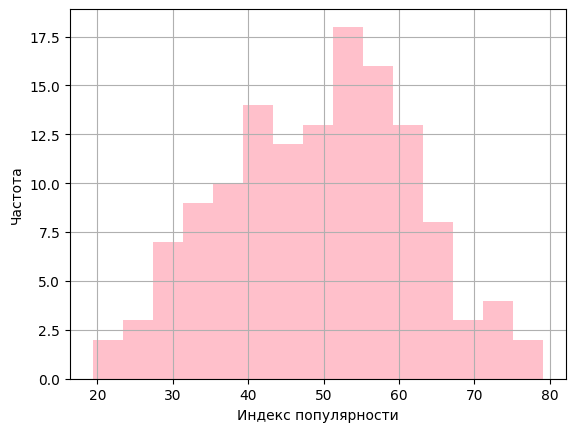

In [198]:
plt.hist(data['ind_popularity'], bins = 15, color='pink')
plt.grid()
plt.xlabel('Индекс популярности')
plt.ylabel('Частота')
plt.show()

Ну вроде даже есть подозрение на какую-никакую нормальность. Ну, конечно, при условии, что я с размером бинов побаловался. Так-то вряд ли бы что вышло ну вот просто так. Но в целом, какая-то претензия на соответствие ЦПТ уже имеется, этому мы и порадуемся и продолжим копаться во всей этой истории. Потому что дальше начинается какой-то мрак.

Сейчас быстренько разобьем по категориям, чтобы смотреть как они ведут себя в группах. В частности, где средний индекс популярности побольше, та категория в среднем и сама по себе популярнее. Ну, логично. Чтобы понимать, какую нам расстановку сделать в той части задания, где надо раскидать отделы между собой.

                   ind_popularity  quantity
dep                                        
Computers&Tablets       55.828628       444
Appliances              52.820926       257
Video Gaming            47.494198       181
Audio                   46.341102        50
TV&Home Theater         43.719884       383
Cameras                 38.302441       165
Cell Phones             32.482116        55


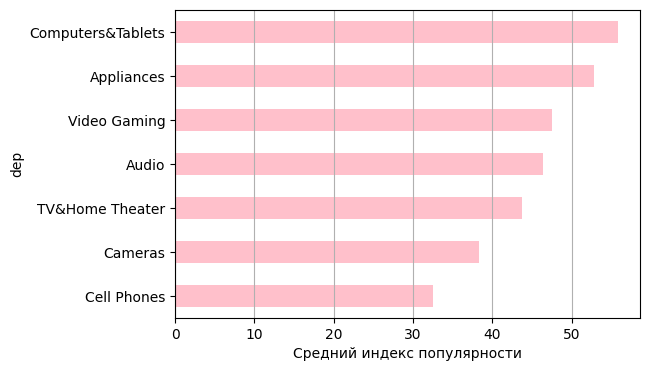

In [219]:
category_analysis = data.groupby('dep').agg({
    'ind_popularity': 'mean',
    'quantity': 'sum'
}).sort_values('ind_popularity', ascending=False)

print(category_analysis)

plt.figure(figsize=(6, 4))
category_analysis['ind_popularity'].sort_values().plot(kind='barh', color='pink')
plt.xlabel('Средний индекс популярности')
plt.grid(axis='x')
plt.show()

По идее, если упрощенно все так воспринимать, то как раз и получится, что самые популярные - нужно ближе всего к кассам и с наименьшим расстоянием от входа, а наименее популярные - дальше всего от касс. В силу близости кассы и входа, просто убирать их дальше всего.


### Моделирование магазинчика

Сейчас мы будем играть в своего рода раскраску. Нарисуем магазинчик, разлинуем по секторам, будем считать убытки, пониже поясню, как именно мы считаем эти вот вероятные потери.

In [332]:
np.random.seed(42)

store_width, store_height = 48, 48
entrance = (35, 2)  
checkout = (24, 12)

categories = data['dep'].unique()

Сделаем разбивку категорий по исходному рисунку. Приблизительно так, как это было бы в жизни. С расчётом на то, что мы в любом случае минимизируем издержки, располагая товары в разных местах. 

In [333]:
departments = {
    'Computers&Tablets': {'x1': 22, 'y1': 16, 'x2': 40, 'y2': 27, 'color': 'pink'},
    'TV&Home Theater':   {'x1': 22, 'y1': 30, 'x2': 40, 'y2': 42, 'color': 'blue'},
    'Appliances':        {'x1': 4, 'y1': 30, 'x2': 18, 'y2': 42, 'color': 'violet'},
    'Video Gaming':      {'x1': 2, 'y1': 47, 'x2': 44, 'y2': 48, 'color': 'purple'},
    'Cameras':           {'x1': 4, 'y1': 16, 'x2': 18, 'y2': 27, 'color': 'grey'},
    'Audio':             {'x1': 44, 'y1': 5, 'x2': 46, 'y2': 46, 'color': 'green'},
    'Cell Phones':       {'x1': 0, 'y1': 12, 'x2': 1, 'y2': 46, 'color': 'yellow'}
}

Тут немного поколдуем, и выдадим для каждого товара (из тех что мы учитываем в наших планировках) суммарный риск, зависящий от расстояния до входа, от расстояния до кассы и от скопления людей. В первом случае - экспоненциальное распределение и архимедово (вроде бы?) расстояние, т.к. люди постепенно скапливаются, во втором случае считаем манхэтеннское расстояние, т.к. люди ходят по проходам по прямым. Деление на 72, т.к. предполагаем это как наибольшее возможное расстояние в пути. Риск из-за популярности - просто в доле.

In [334]:
def calculate_total_risk(layout_df):
    total_risk = 0
    for _, item in layout_df.iterrows():
        # риск проблем от входа
        dist_entrance = np.sqrt((item['x']-entrance[0])**2 + (item['y']-entrance[1])**2)
        entrance_risk = np.exp(-0.03 * dist_entrance)
        
        # риск транспортировки
        dist_checkout = abs(item['x']-checkout[0]) + abs(item['y']-checkout[1])
        transport_risk = (dist_checkout / 72) * item['size_factor']
        
        # риск скопления людей
        popularity_risk = item['popularity'] / 100
        
        total_risk += 0.4*entrance_risk + 0.3*transport_risk + 0.3*popularity_risk
    return total_risk

Дальше функции для работы с планировкой. При учете заданных зон (см. график / рисунок ниже). То есть сначала мы с помощью равномерного распределения генерируем случайное положение для товара внутри его категории, а потом через нормальное распределение делаем случайный сдвиг, и ищем таким образом (это вроде бы можно называть методом симуляций Монте-Карло) ситуацию с наименьшим риском.

In [335]:
# изначальная планировка
def generate_initial_layout(data, departments):
    layout = []
    for dep in departments:
        dep_items = data[data['dep'] == dep].nlargest(5, 'ind_popularity')
        area = departments[dep]
        
        for i, (_, item) in enumerate(dep_items.iterrows()):
            x = np.random.uniform(area['x1']+1, area['x2']-1)
            y = np.random.uniform(area['y1']+1, area['y2']-1)
            layout.append({
                'item': item['item'][:20] + '...' if len(item['item']) > 20 else item['item'],
                'dep': dep,
                'x': x,
                'y': y,
                'popularity': item['ind_popularity'],
                'size_factor': 0.9 if dep in ['TV&Home Theater', 'Appliances'] else 0.5
                # тут докидываем фактор размера, если товар в категории больших - у него и этот фактор больше, соответственно
            })
    return pd.DataFrame(layout)


# попытка в оптимизацию
def optimize_layout(layout_df, iterations=100):
    best_layout = layout_df.copy()
    best_risk = calculate_total_risk(best_layout)
    
    for _ in range(iterations):
        current_layout = layout_df.copy()
        # случайное смещение товаров в пределах их зон
        for i, row in current_layout.iterrows():
            area = departments[row['dep']]
            current_layout.at[i, 'x'] = np.clip(
                row['x'] + np.random.normal(0, 2), 
                area['x1']+1, 
                area['x2']-1
            )
            current_layout.at[i, 'y'] = np.clip(
                row['y'] + np.random.normal(0, 2),
                area['y1']+1,
                area['y2']-1
            )
        
        current_risk = calculate_total_risk(current_layout)
        if current_risk < best_risk:
            best_layout = current_layout.copy()
            best_risk = current_risk
    
    return best_layout

Теперь все сгенерируем.

In [336]:
initial_layout = generate_initial_layout(data, departments)
optimized_layout = optimize_layout(initial_layout, iterations=10000)

И нариусем.

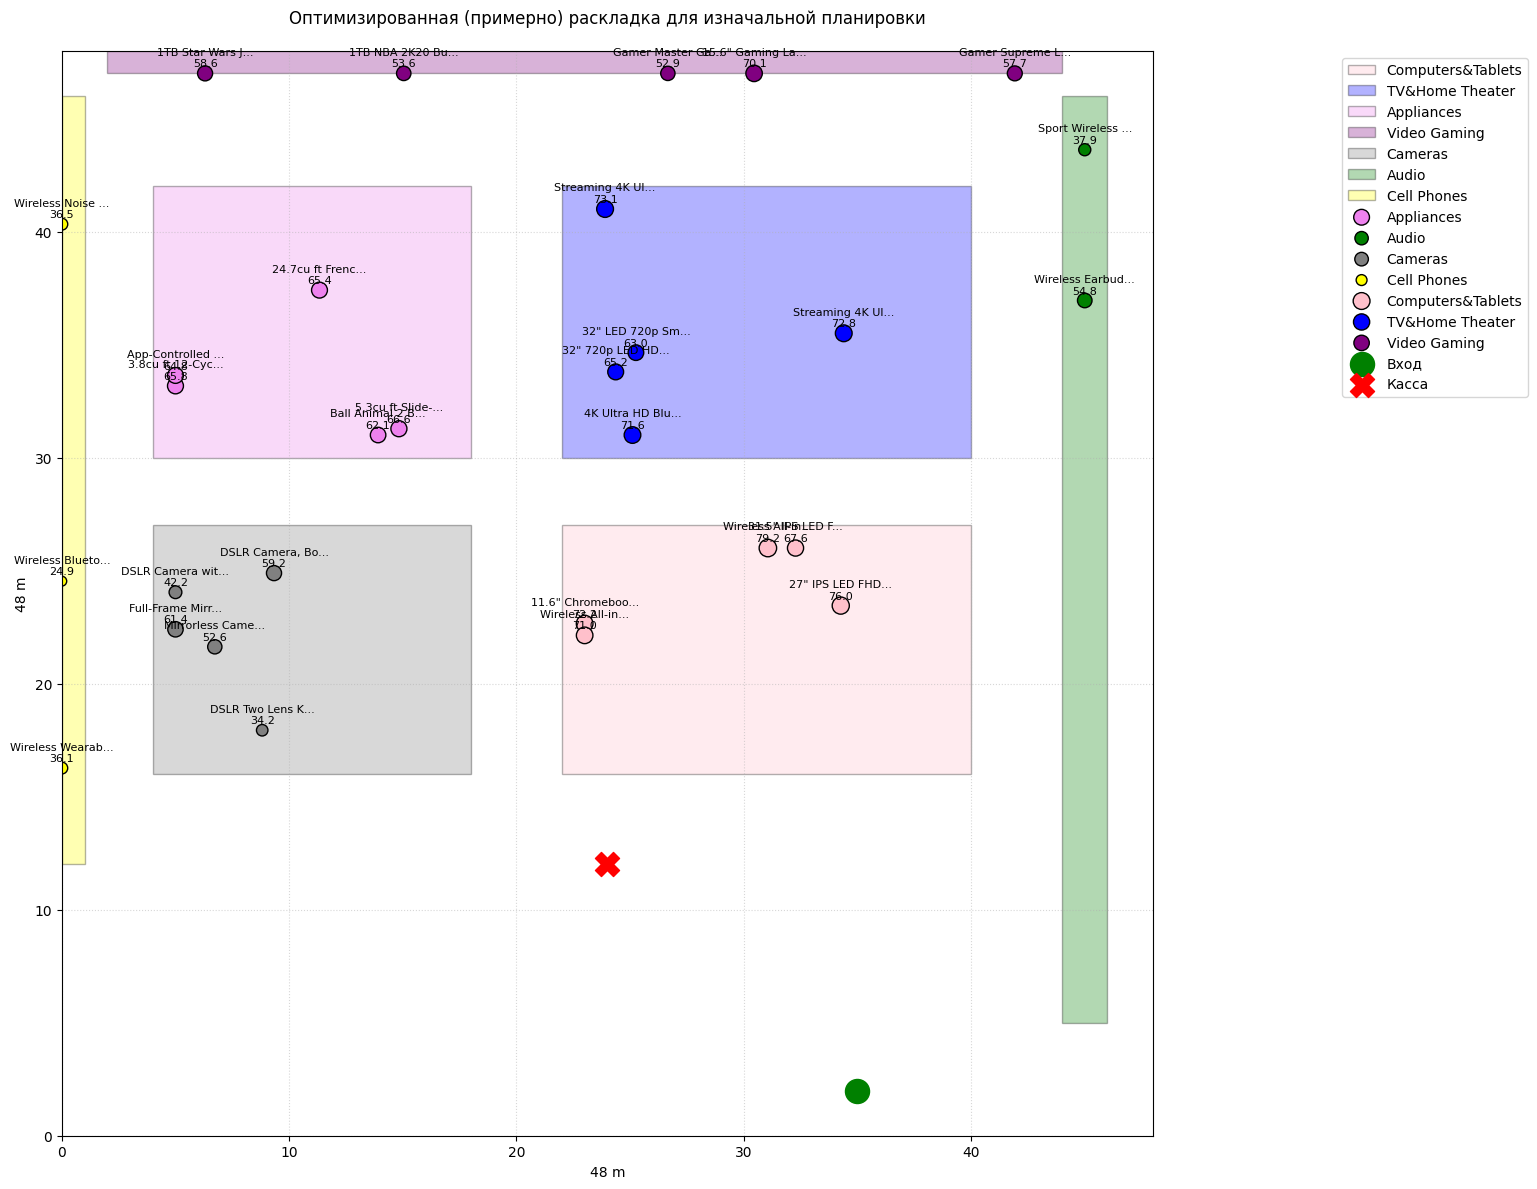

In [337]:
plt.figure(figsize=(16, 12))
ax = plt.gca()

# зоны товаров
for dep, area in departments.items():
    ax.add_patch(Rectangle(
        (area['x1'], area['y1']), 
        area['x2']-area['x1'], 
        area['y2']-area['y1'],
        facecolor=area['color'], 
        edgecolor='black', 
        alpha=0.3,
        label=dep
    ))

# сами товары
for dep in categories:
    dep_items = optimized_layout[optimized_layout['dep'] == dep]
    ax.scatter(
        dep_items['x'], dep_items['y'], 
        s=dep_items['popularity']*2,
        c=[departments[dep]['color'] for _ in range(len(dep_items))],
        edgecolors='black',
        label=dep
    )
    for _, row in dep_items.iterrows():
        ax.annotate(
            f"{row['item'][:15]}...\n{row['popularity']:.1f}", 
            (row['x'], row['y']),
            textcoords="offset points",
            xytext=(0,5),
            ha='center',
            fontsize=8
        )

# точки вззода и кассы
ax.scatter(entrance[0], entrance[1], color='green', s=300, marker='o', label='Вход')
ax.scatter(checkout[0], checkout[1], color='red', s=300, marker='X', label='Касса')

plt.title('Оптимизированная (примерно) раскладка для изначальной планировки', pad=20)
plt.xlabel('48 m')
plt.ylabel('48 m')
plt.legend(bbox_to_anchor=(1.35, 1))
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0, 48)
plt.ylim(0, 48)
plt.tight_layout()
plt.show()

Теперь прикидываем риски по каждой из категорий, потом считаем вероятные потери. Замечу, что все выглядит крайне консервативно, и риска ну модель прямо-таки много предполагает.

In [346]:
risk_by_dep = optimized_layout.groupby('dep').apply(
    lambda x: calculate_total_risk(x) / len(x)
)

print('Риски по категориям')
print(f'{risk_by_dep}\n\n')

data['total_item_value'] = data['disc_price'] * data['quantity']
z = data.groupby('dep').sum()['total_item_value'] * risk_by_dep
total = z.sum()

print('Возможные потери')
print(f'{z}\n\n Всего - {round(total)} $')

Риски по категориям
dep
Appliances           0.440988
Audio                0.420702
Cameras              0.382182
Cell Phones          0.287213
Computers&Tablets    0.421047
TV&Home Theater      0.468812
Video Gaming         0.388693
dtype: float64


Возможные потери
dep
Appliances            68237.339451
Audio                  2650.210589
Cameras               65237.900062
Cell Phones            2484.233526
Computers&Tablets     71616.094642
TV&Home Theater      122442.593848
Video Gaming          46694.874552
dtype: float64

 Всего - 379363 $


C:\Users\leopa\AppData\Local\Temp\ipykernel_6160\3761052119.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  risk_by_dep = optimized_layout.groupby('dep').apply(


Если честно, я слегка недоволен. Ну, значения прямо сильно случайные получаются, и очень большие, особенно если смотреть по графику вообще какой-то бред. Но какая модель, такая модель... Ну, может оно так и в жизни - куда ни положишь, все равно все поломают. По меньшей мере, мы пытались. Теперь предложим и свою планировку.

### Перерисованные отделы

Так как у меня плохо с моделированием (вы можете заметить это выше), я просто перезадам зоны в более оптимальном виде, и модель сама раскидает товары внутри них. Потом посчитаем риски еще разочек, и сравним наши суммарные вероятные убытки. Собственно, на этом можно будет и закончить всё.

In [339]:
departments = {
    'Computers&Tablets': {'x1': 5, 'y1': 17, 'x2': 19, 'y2': 28, 'color': 'grey'},
    'TV&Home Theater':   {'x1': 0, 'y1': 12, 'x2': 2, 'y2': 46, 'color': 'yellow'},
    'Appliances':        {'x1': 5, 'y1': 31, 'x2': 22, 'y2': 43, 'color': 'violet'},
    'Video Gaming':      {'x1': 25, 'y1': 31, 'x2': 43, 'y2': 43, 'color': 'blue'},
    'Cameras':           {'x1': 25, 'y1': 17, 'x2': 33, 'y2': 28, 'color': 'pink'},
    'Audio':             {'x1': 35, 'y1': 17, 'x2': 43, 'y2': 28, 'color': 'green'},
    'Cell Phones':       {'x1': 2, 'y1': 46, 'x2': 44, 'y2': 48, 'color': 'purple'}
}

In [340]:
initial_layout = generate_initial_layout(data, departments)
optimized_layout = optimize_layout(initial_layout, iterations=10000)

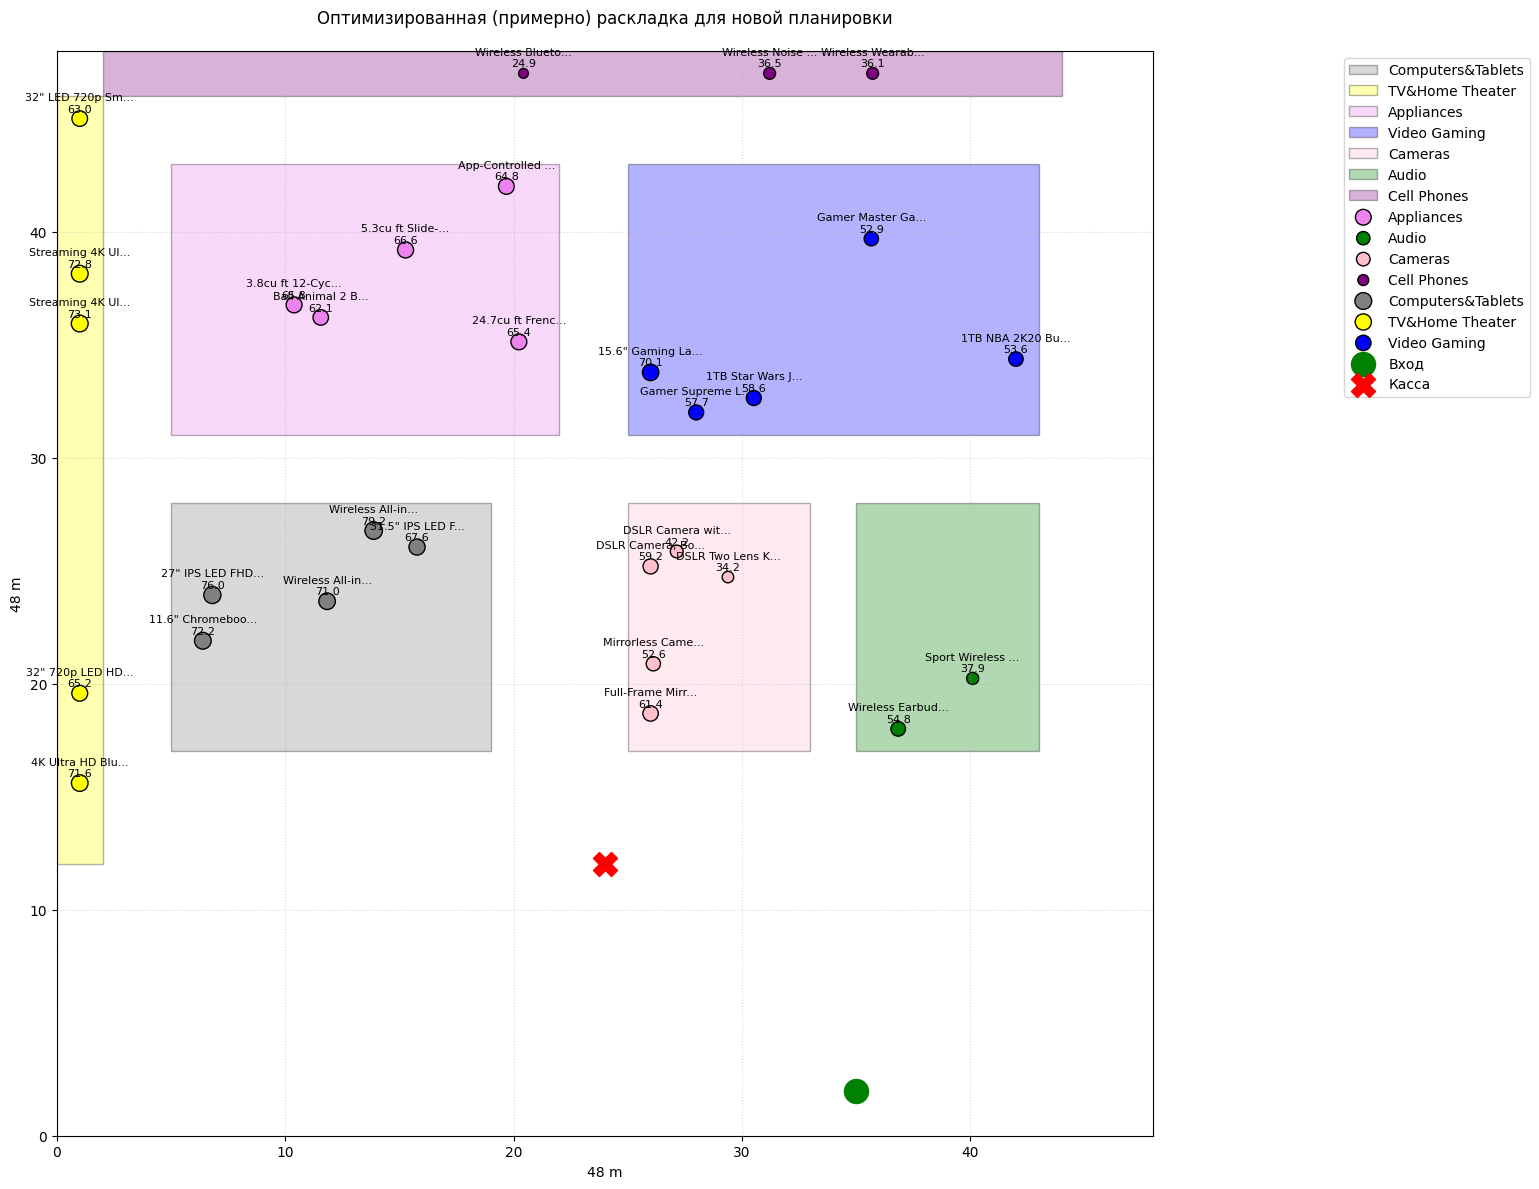

In [341]:
plt.figure(figsize=(16, 12))
ax = plt.gca()

# зоны товаров
for dep, area in departments.items():
    ax.add_patch(Rectangle(
        (area['x1'], area['y1']), 
        area['x2']-area['x1'], 
        area['y2']-area['y1'],
        facecolor=area['color'], 
        edgecolor='black', 
        alpha=0.3,
        label=dep
    ))

# сами товары
for dep in categories:
    dep_items = optimized_layout[optimized_layout['dep'] == dep]
    ax.scatter(
        dep_items['x'], dep_items['y'], 
        s=dep_items['popularity']*2,
        c=[departments[dep]['color'] for _ in range(len(dep_items))],
        edgecolors='black',
        label=dep
    )
    for _, row in dep_items.iterrows():
        ax.annotate(
            f"{row['item'][:15]}...\n{row['popularity']:.1f}", 
            (row['x'], row['y']),
            textcoords="offset points",
            xytext=(0,5),
            ha='center',
            fontsize=8
        )

# точки вззода и кассы
ax.scatter(entrance[0], entrance[1], color='green', s=300, marker='o', label='Вход')
ax.scatter(checkout[0], checkout[1], color='red', s=300, marker='X', label='Касса')

plt.title('Оптимизированная (примерно) раскладка для новой планировки', pad=20)
plt.xlabel('48 m')
plt.ylabel('48 m')
plt.legend(bbox_to_anchor=(1.35, 1))
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0, 48)
plt.ylim(0, 48)
plt.tight_layout()
plt.show()

Снова считаем риски, сравниваем значения.

In [344]:
risk_by_dep = optimized_layout.groupby('dep').apply(
    lambda x: calculate_total_risk(x) / len(x)
)

print('Риски по категориям')
print(f'{risk_by_dep}\n\n')

data['total_item_value'] = data['disc_price'] * data['quantity']
y = data.groupby('dep').sum()['total_item_value'] * risk_by_dep
total_second = z.sum()

print('Возможные потери')
print(f'{z}\n\n Всего - {round(total)} $')

Риски по категориям
dep
Appliances           0.440988
Audio                0.420702
Cameras              0.382182
Cell Phones          0.287213
Computers&Tablets    0.421047
TV&Home Theater      0.468812
Video Gaming         0.388693
dtype: float64


Возможные потери
dep
Appliances            69279.341103
Audio                  2294.774910
Cameras               59470.289932
Cell Phones            2491.346562
Computers&Tablets     77250.925335
TV&Home Theater      116798.703590
Video Gaming          44055.297060
dtype: float64

 Всего - 371641 $


C:\Users\leopa\AppData\Local\Temp\ipykernel_6160\2281050611.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  risk_by_dep = optimized_layout.groupby('dep').apply(


In [356]:
print(f'Больше ли суммарные потери при изначальной планировке? {total > total_second}')
print(round((total - total_second) / total * 100, 2), '%')

Больше ли суммарные потери при изначальной планировке? True
2.04 %


Короче, модель ну явно несовершенна (хотя я даже до 10 тысяч итераций поднял), и не то чтобы предлагает нам какую-то оптицизацию. Вот эти два процента ощущаются скорее как погрешность, нежели результат реально хорошей оптимизации. Но что есть то есть! Во всяком случае это лучше чем ничего. Не постесняюсь потом даже на гитхаб выложить :)